<a href="https://colab.research.google.com/github/dhirajsing-rajput-2108/Spam_Message_Classificaion/blob/main/Spam_Message_Classificaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Preprocessing**

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("C:/Users/2261397/Downloads/spam (1).tsv", sep="\t")

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
 df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df["label"].value_counts()/len(df)*100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [ ]:
ham= df[df["label"]=="ham"]
spam=df[df["label"]=="spam"]

In [ ]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [ ]:
ham=ham.sample(spam.shape[0])

In [ ]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [ ]:
data = ham._append(spam, ignore_index=True)

In [ ]:
data.shape

(1494, 4)

In [ ]:
data["label"].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [ ]:
data.head()

,label,message,length,punct
0,ham,Eek that's a lot of time especially since Amer...,103,4
1,ham,Huh? 6 also cannot? Then only how many mistakes?,48,3
2,ham,No we sell it all so we'll have tons if coins....,126,6
3,ham,I asked you to call him now ok,30,0
4,ham,Were somewhere on Fredericksburg,32,0


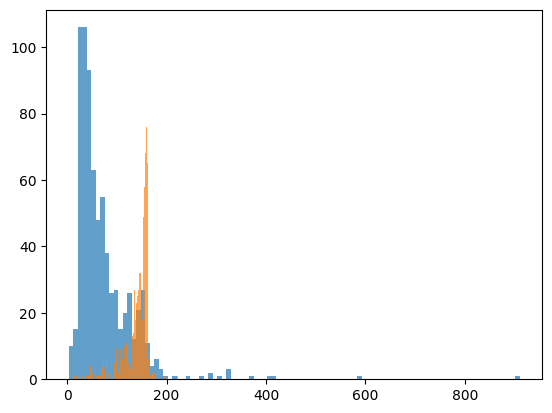

In [ ]:
plt.hist(data[data["label"]=="ham"]['length'],bins=100,alpha=0.7)
plt.hist(data[data["label"]=="spam"]['length'],bins=100,alpha=0.7)
plt.show()

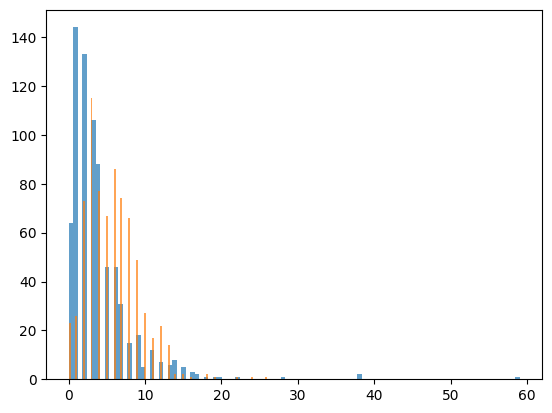

In [ ]:
plt.hist(data[data["label"]=="ham"]['punct'],bins=100,alpha=0.7)
plt.hist(data[data["label"]=="spam"]['punct'],bins=100,alpha=0.7)
plt.show()

**2. Spilt Data in Traning and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data

,label,message,length,punct
0,ham,Eek that's a lot of time especially since Amer...,103,4
1,ham,Huh? 6 also cannot? Then only how many mistakes?,48,3
2,ham,No we sell it all so we'll have tons if coins....,126,6
3,ham,I asked you to call him now ok,30,0
4,ham,Were somewhere on Fredericksburg,32,0
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [ ]:
x_train, x_tets , y_train, y_test = train_test_split(data["message"], data["label"], test_size = 0.3 ,random_state=0,shuffle=True)

In [ ]:
x_train.shape , x_tets.shape

((1045,), (449,))

**3. Building the model(Random Forest)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [ ]:
classifier=Pipeline([("Tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

**4. Predicting the Model(Rnadom Forest)**

In [ ]:
y_pred = classifier.predict(x_tets)

In [ ]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [ ]:
confusion_matrix(y_test,y_pred)

array([[225,   2],
       [ 22, 200]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



**5. Building SVM Model**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C=100, gamma="auto"))])

In [ ]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

**6. Predicting SVM Model**

In [ ]:
y_pred1 = svm.predict(x_tets)

In [ ]:
accuracy_score(y_test,y_pred1)

0.9510022271714922

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[224,   3],
       [ 19, 203]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



**7. Predict Testing Data**

In [ ]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [ ]:
classifier.predict(test1)

array(['ham'], dtype=object)

In [ ]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [ ]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
